Importing libraries

In [ ]:
from sklearn.datasets import make_classification

Generate the Dataset

In [3]:
X,Y  = make_classification(n_samples = 1000, n_classes = 2, n_features = 5, n_redundant = 0, random_state = 1)

In [4]:
X.shape

(1000, 5)

In [5]:
Y.shape

(1000,)

Data Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [10]:
X_test.shape, Y_test.shape

((200, 5), (200,))

Build Classification Models

In [14]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [17]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process", "Gradient_Boosting", "Decision_Tree", "Extra_trees", "Random_Forest", "Neural_Net", "AdaBoost", "Naive_Bayes", "QDA", "SGD"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel = 'linear', C=0.025),
    SVC(kernel = 'poly', degree = 3, C=0.025),
    SVC(kernel = 'rbf', C=1, gamma = 2),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    GradientBoostingClassifier(n_estimators = 100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators = 10, min_samples_split = 2),
    RandomForestClassifier(max_depth = 5, n_estimators = 100),
    MLPClassifier(alpha=1, max_iter = 1000),
    AdaBoostClassifier(n_estimators = 100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss='hinge', penalty = 'l2')
]

In [22]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [23]:
scores

[0.87,
 0.855,
 0.845,
 0.845,
 0.9,
 0.865,
 0.885,
 0.87,
 0.87,
 0.88,
 0.815,
 0.865,
 0.865,
 0.87]

Creating DataFrame 

In [24]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['name'] = names
df['score'] = scores

In [25]:
df

,name,score
0,Nearest_Neighbors,0.870
1,Linear_SVM,0.855
2,Polynomial_SVM,0.845
3,RBF_SVM,0.845
4,Gaussian_Process,0.900
5,Gradient_Boosting,0.865
6,Decision_Tree,0.885
7,Extra_trees,0.870
8,Random_Forest,0.870
9,Neural_Net,0.880


In [28]:
cm = sns.light_palette("pink", as_cmap = True)
s = df.style.background_gradient(cmap = cm)
s

,name,score
0,Nearest_Neighbors,0.870000
1,Linear_SVM,0.855000
2,Polynomial_SVM,0.845000
3,RBF_SVM,0.845000
4,Gaussian_Process,0.900000
5,Gradient_Boosting,0.865000
6,Decision_Tree,0.885000
7,Extra_trees,0.870000
8,Random_Forest,0.870000
9,Neural_Net,0.880000


Bar plot of model Performance

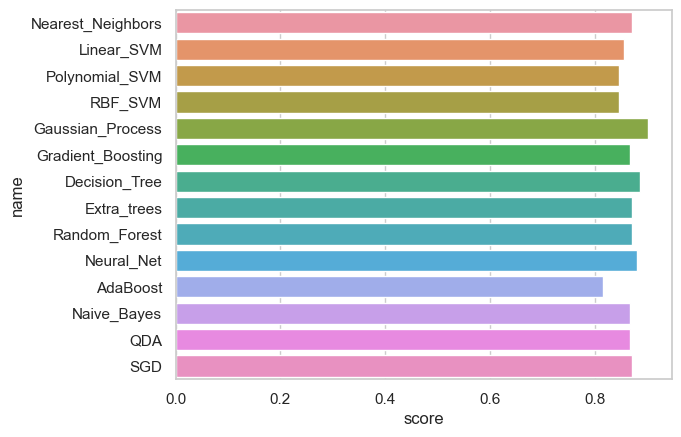

In [29]:
sns.set(style = "whitegrid")
ax = sns.barplot(x = "score", y = "name", data)